# Comparing the Proportion of Violent Crimes Between Two Neighbourhoods in Vancouver

# Introduction

From the news and government reports, the total number of violent crimes increases over recents years. Compared to pre-pandemic levels, violent crime increased by 12 percent in Vancouver area (Penny Daflos, 2023).

This project attempts to investigate more about violent crimes in Vancouver, Canada. The dataset used is taken from the Vancouver Police Department from the years 2022 to 2023 of the neighbourhoods Hastings-Sunrise and West Point Grey (Official Website of the Vancouver Police Department, 2023). These neighbourhoods were chosen as West Point Grey is towards the west of Vancouver and the other is towards the east and neighbourhoods too close may yield similar results.

We want to answer the following question:

**Is there a significant difference between the proportion of violent crimes (homicides and offences against another person) within the past two years between two different neighbourhoods, specifically, Hastings-Sunrise and West Point Grey?**


The columns in this dataset contain the following columns:
1. ``Type``: of crime
2. ``Year``
3. ``Month``
4. ``Day``
5. ``Hour``
6. ``Minute``
7. ``Hundred_Block`` (generalized location of the crime)
8. ``Neighbourhood``
9. ``X``: coordinate
10. ``Y``: coordinate

The type of crimes recorded includes:
1. ``BNE Commercial``: (Commercial Break and Enter)
2. ``BNE Residential/Other``
3. ``Vehicle Collision or Pedestrian Struck (with Fatality)``
4. ``Vehicle Collision or Pedestrian Struck (with Injury)``
5. ``Homicide``
6. ``Mischief``
7. ``Offence Against a Person``
8. ``Other Theft``
9. ``Theft from Vehicle``
10. ``Theft of Vehicle``
11. ``Theft of Bicycle``

# Preliminary Results


## Required Packages

In [1]:
library(tidyverse)
library(base)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Reading data from the web

In [2]:
hastings_2023 <- read_csv("https://raw.githubusercontent.com/Carson-Lu/stat201project-Group27/main/crimedata_csv_Hastings-Sunrise_2023.csv")
hastings_2022 <- read_csv("https://raw.githubusercontent.com/Carson-Lu/stat201project-Group27/main/crimedata_csv_Hastings-Sunrise_2022.csv")
west_point_grey_2022 <- read_csv("https://raw.githubusercontent.com/Carson-Lu/stat201project-Group27/main/crimedata_csv_West%20Point%20Grey_2022.csv")
west_point_grey_2023 <- read_csv("https://raw.githubusercontent.com/Carson-Lu/stat201project-Group27/main/crimedata_csv_West%20Point%20Grey_2023.csv")

Rows: 482 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 946 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 238 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this

## Data cleaning and wrangling

## Combining all the datasets into one

In [3]:
crimes <- rbind(hastings_2022, hastings_2023, west_point_grey_2022, west_point_grey_2023)
head(crimes)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Theft from Vehicle,2022,5,16,4,20,11XX NOOTKA ST,Hastings-Sunrise,496992.1,5457928
Theft from Vehicle,2022,10,9,2,0,11XX ROSSLAND ST,Hastings-Sunrise,496691.3,5457991
Theft from Vehicle,2022,4,28,17,0,12XX LILLOOET ST,Hastings-Sunrise,497174.1,5457852
Theft from Vehicle,2022,4,17,5,17,12XX ROSSLAND ST,Hastings-Sunrise,496689.9,5457876
Theft from Vehicle,2022,11,8,22,0,12XX SKEENA ST,Hastings-Sunrise,497929.5,5457926
Theft from Vehicle,2022,8,18,20,46,13XX KAMLOOPS ST,Hastings-Sunrise,496017.2,5457788


Table 1: combined crimes dataset

##  Cleaning the dataset

In [4]:
# removing unwanted columns from the dataset
crimes_cleaned <-  crimes |> 
    select(TYPE, YEAR, MONTH, DAY, NEIGHBOURHOOD) |>
    filter(!is.na(TYPE))

# Checking the max day in July 2023
crimes_cleaned |> 
    filter(YEAR == 2023 & MONTH == 7) |>
    select(DAY) |>
    pull() |>
    max()

# Since the most recent date in July was the 19th, it is probably not complete so we can leave that out 
crimes_cleaned <- crimes_cleaned |>
    filter(YEAR != 2023 | MONTH != 7)

head(crimes_cleaned)

[1] 19

TYPE,YEAR,MONTH,DAY,NEIGHBOURHOOD
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Theft from Vehicle,2022,5,16,Hastings-Sunrise
Theft from Vehicle,2022,10,9,Hastings-Sunrise
Theft from Vehicle,2022,4,28,Hastings-Sunrise
Theft from Vehicle,2022,4,17,Hastings-Sunrise
Theft from Vehicle,2022,11,8,Hastings-Sunrise
Theft from Vehicle,2022,8,18,Hastings-Sunrise


Table 2: Cleaned crimes dataset

## Plots

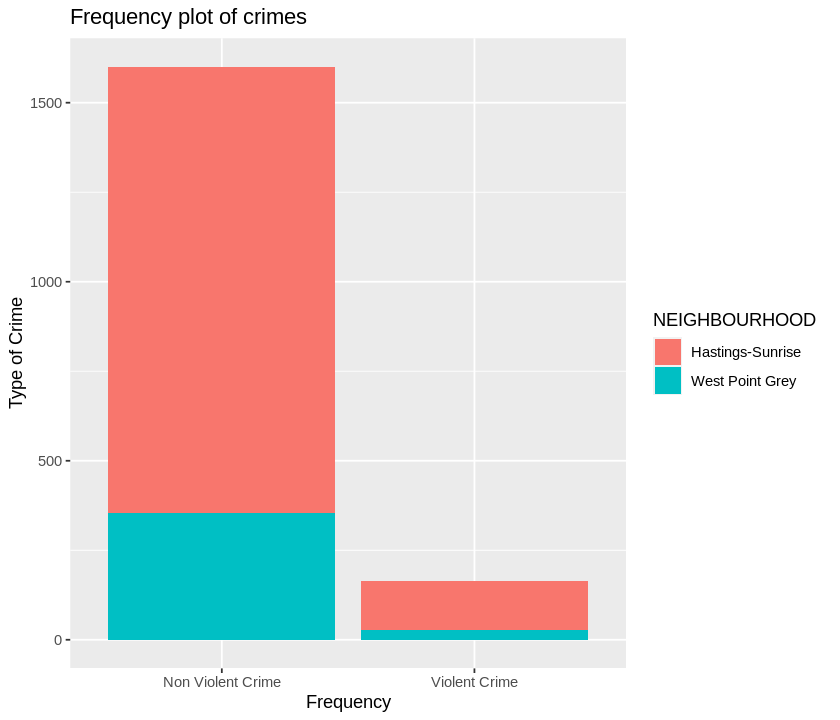

In [5]:
# Adjusting plot sizes
options(repr.plot.width=7, repr.plot.height=6)
vcrimes_vs_allcrimes <- crimes_cleaned

# Grouping "Homicide" and "Offence Against a Person" as the same type
vcrimes_vs_allcrimes$TYPE <- replace(vcrimes_vs_allcrimes$TYPE, vcrimes_vs_allcrimes$TYPE == "Homicide", "Violent Crime")
vcrimes_vs_allcrimes$TYPE <- replace(vcrimes_vs_allcrimes$TYPE, vcrimes_vs_allcrimes$TYPE == "Offence Against a Person", "Violent Crime")

# Grouping all other crimes as "non-violent" crimes
vcrimes_vs_allcrimes$TYPE <- replace(vcrimes_vs_allcrimes$TYPE, vcrimes_vs_allcrimes$TYPE != "Violent Crime", "Non Violent Crime")

# Plotting to see the difference between violent and non violent crimes
vcrimes_vs_allcrimes |>
    ggplot(aes(x = TYPE, fill = NEIGHBOURHOOD)) +
    geom_bar() +
    ggtitle("Frequency plot of crimes") +
    xlab("Frequency") +
    ylab("Type of Crime")

Plot 1: Frequency plot of crimes

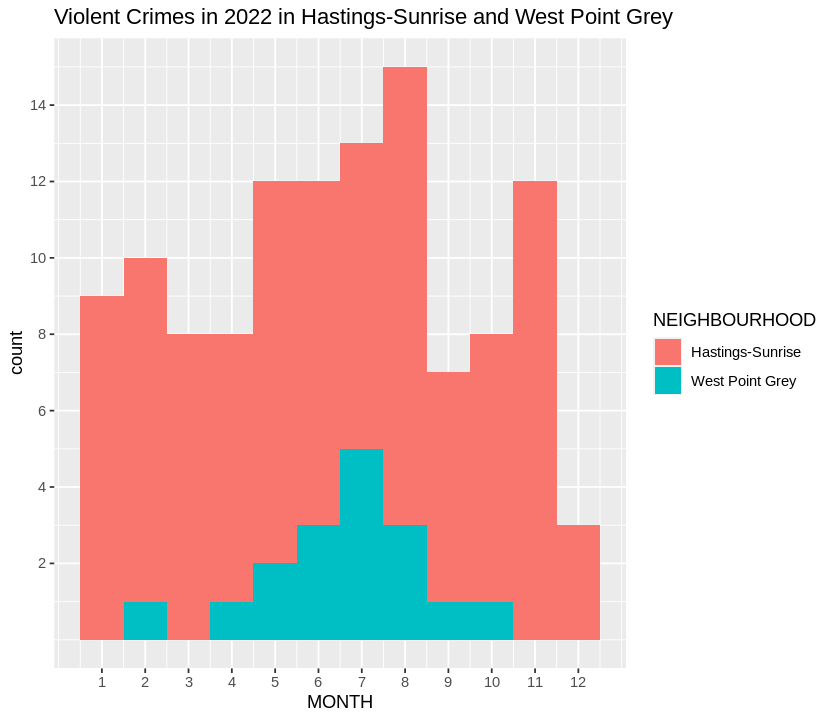

In [6]:
# Histogram of violent crimes plot in 2022
vcrimes_vs_allcrimes |>
    filter(TYPE == "Violent Crime") |>
    filter(YEAR == 2022) |>
    ggplot() +
    geom_histogram(aes(x = MONTH, fill = NEIGHBOURHOOD), bins = 12) + 
    ggtitle("Violent Crimes in 2022 in Hastings-Sunrise and West Point Grey") +
    scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)) +
    scale_y_continuous(breaks = c(2, 4, 6, 8, 10, 12, 14, 16, 18))

Plot 2: Histogram of Violent Crimes in Hastings-Sunrise and West Point Grey 2022

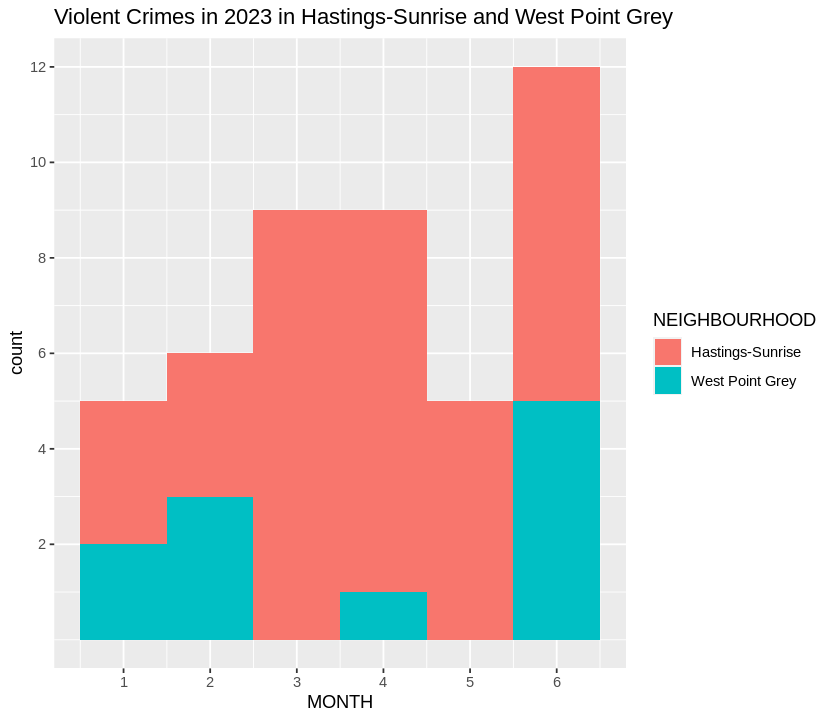

In [7]:
vcrimes_vs_allcrimes |>
    filter(TYPE == "Violent Crime") |>
    filter(YEAR == 2023) |>
    ggplot() +
    geom_histogram(aes(x = MONTH, fill = NEIGHBOURHOOD), bins = 6) + 
    ggtitle("Violent Crimes in 2023 in Hastings-Sunrise and West Point Grey") +
    scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)) +
    scale_y_continuous(breaks = c(2, 4, 6, 8, 10, 12, 14))

Plot 3: Histogram of Violent Crimes in Hastings-Sunrise and West Point Grey 2023

## Computing the average monthly crime rate of each neighbourhood

In [8]:
#filtering Offence Against a Person & Homicide crimes as they are considered violent
violent_crimes <- crimes_cleaned |> 
    filter(TYPE == "Offence Against a Person" | TYPE == "Homicide") 

In [9]:
# counting number of crimes per month for Hastings-Sunrise and West Point Grey
crimes_per_month_neighbourhood <- violent_crimes |> 
    group_by(YEAR, MONTH, NEIGHBOURHOOD) |> 
    summarise(count = n(), .groups = "drop")

# Number of months since July 2023 not included as it is not complete (and therefore we also have no data further on)
num_months <- 18 

avg_monthly_vcrimes_west_point_grey <- crimes_per_month_neighbourhood |>
    filter(NEIGHBOURHOOD == "West Point Grey") |>
    select(count) |>
    sum() / num_months

avg_monthly_vcrimes_west_Hastings_Sunrise <- crimes_per_month_neighbourhood |>
    filter(NEIGHBOURHOOD == "Hastings-Sunrise") |>
    select(count) |>
    sum() / num_months

cat("Average monthly violent crimes in West Point Grey from our sample: ", avg_monthly_vcrimes_west_point_grey)
cat("\nAvarege monthly violent crimes in Hastings Sunrise from our sample: ", avg_monthly_vcrimes_west_Hastings_Sunrise)

Average monthly violent crimes in West Point Grey from our sample:  1.555556
Avarege monthly violent crimes in Hastings Sunrise from our sample:  7.5

Results 1: Average monthly crime rate

## Computing proportion of violent crimes in each neighbourhood

In [10]:
#filtering West Point Grey neighbourhood
vcrimes_in_point_grey_count <- violent_crimes |> 
    filter(NEIGHBOURHOOD == "West Point Grey") |>
    nrow()

#filtering Hastings Sunrise neighbourhood
vcrimes_in_hastings_count <- violent_crimes |> 
    filter(NEIGHBOURHOOD == "Hastings-Sunrise") |>
    nrow()

crimes_in_point_grey_count <- crimes |>
    nrow()

crimes_in_hastings_count <- crimes |>
    nrow()

prop_vcrimes_point_grey <- vcrimes_in_point_grey_count / crimes_in_point_grey_count
prop_vcrimes_hastings <- vcrimes_in_hastings_count / crimes_in_hastings_count

cat("Proportion of violent crimes in West Point Grey from our sample: ", prop_vcrimes_point_grey)
cat("\nProportion of violent crimes in Hastings Sunrise from our sample: ", prop_vcrimes_hastings)

Proportion of violent crimes in West Point Grey from our sample:  0.01529219
Proportion of violent crimes in Hastings Sunrise from our sample:  0.0737302

Results 2: Proportion of violent crimes from our sample

# Methods: Plan

## Analysis of preliminary exploration

### What do you expect to find?



According to past data from The Vancouver Police Department (2023), we expect to see that there is a significant difference between the proportion of violent crimes in the West Point Grey neighbourhood compared to the Hasting-Sunrise neighbourhood. By comparing the proportion of violent crimes in these two areas, we can get an idea about the overall safety level between them. 

### What future questions could this lead to?

1. What leads to the differences in violent crimes rate?
2. Will the population density or the economic conditional matter? 
3. If there is a significant difference, why do different areas in Vancouver have this difference? 
4. Based on the time, does the violent crime ratio in these two areas increase or decrease?


### What impact could such findings have?

1. Residences will have a better understanding which neighbourhood is safer. By knowing the difference in violent crime rates, people can add it to consideration while deciding where to live. 
2. Policies may get benefits from our findings. Adding more resources to the area with higher violent crime rate may help reduce the number and build a safer community, 


# References

1. Andresen, M. A., & Brantingham, P. (2007, January 1). Hot spots of crime in Vancouver and their relationship with population characteristics. Www.crimrxiv.com. https://www.crimrxiv.com/pub/m7grqa2y/release/1
2. Official Website of the Vancouver Police Department. (2023). VPD OPEN DATA. Geodash.vpd.ca. https://geodash.vpd.ca/opendata/
3. Penny Daflos. (2023, February 23). 2022 saw a 12 per cent increase in violent crime in Vancouver compared to pre-pandemic levels: report. CTV NEWS. https://bc.ctvnews.ca/2022-saw-a-12-per-cent-increase-in-violent-crime-in-vancouver-compared-to-pre-pandemic-levels-report-1.6287304#:~:text=2022%20saw%20a%2012%20per
4. The Vancouver Police Department. (2023). ArcGIS Dashboards. Vancouverpolice.maps.arcgis.com. https://vancouverpolice.maps.arcgis.com/apps/dashboards/2507e3fdc79b4bfcb4994a3629866fac